### 🧠 **Описание работы алгоритма (перцептрон)**

В этом коде реализован **простой алгоритм линейной классификации — перцептрон**.
Он пытается найти такую прямую (или гиперплоскость), которая разделяет два класса точек — с метками `+1` и `-1`.

---

### 🔹 1. Подготовка данных

```python
x_train = np.array([...])  # координаты точек (обучающая выборка)
y_train = np.array([...])  # метки классов: +1 или -1
```

Каждая строка `x_train` — это вектор признаков точки (например, ширина и длина).
`y_train` указывает, к какому классу принадлежит точка.

---

### 🔹 2. Инициализация параметров

```python
w = np.array([0.8, 0.9])  # веса (вектор нормали)
b = -10                   # смещение (bias)
```

* `w` задаёт направление и ориентацию разделяющей прямой.
* `b` — отвечает за её положение (сдвиг вверх/вниз).

---

### 🔹 3. Правило классификации

Для каждой точки вычисляется **активация**:
[
a(x) = w^T x + b
]

* Если `a(x) > 0`, модель относит точку к классу `+1`.
* Если `a(x) < 0` — к классу `-1`.

---

### 🔹 4. Обновление весов

Во время обучения (цикла по всем точкам):

```python
if y_i * a(x_i) <= 0:
    w += η * y_i * x_i
    b += η * y_i
```

Если точка классифицирована **неверно**, веса `w` и смещение `b` **корректируются** — прямая немного поворачивается или сдвигается, чтобы точка оказалась по правильную сторону.

* `η` — **скорость обучения** (learning rate)
* Коррекция идёт **в направлении метки `y_i`**

---

### 🔹 5. Условие останова

```python
if errors == 0:
    break
```

Если за проход по всем точкам не было ошибок классификации, обучение завершается — значит, прямая нашла корректное разделение.

---

### 🔹 6. Визуализация

На графике отображаются:

* Красные и синие точки (`y = 1` и `y = -1`)
* Зелёная разделяющая линия
* Фиолетовый **вектор нормали `w`**, который перпендикулярен линии и указывает, в какую сторону модель классифицирует как `+1`.

---

### 💬 Интуиция

Перцептрон постепенно подстраивает плоскость так, чтобы:

* точки класса `+1` оказались по одну сторону линии ( w^T x + b = 0 ),
* а точки `-1` — по другую.

Вектор `w` всегда **смотрит в сторону класса +1**.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Данные (точки и метки)
x_train = np.array([
    [10, 50], [20, 30], [25, 30], [20, 60],
    [15, 70], [40, 40], [30, 45], [20, 45],
    [40, 30], [7, 35]
])

y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

# Параметры
N = 100              # количество итераций
η = 0.1              # шаг обучения (learning rate)
w = np.zeros(2)      # начальные веса
b = 0.0              # смещение (bias)



In [ ]:
for _ in range(N):
    errors = 0
    for x_i, y_i in zip(x_train, y_train):
        a = w @ x_i + b
        # Ошибка классификации → обновление весов
        if y_i * a <= 0:             # если ошибка
            w += η * y_i * x_i       # обновляем веса
            b += η * y_i             # обновляем смещение
            errors += 1
    if errors == 0:
        break

print("Итоговые веса:", w)
print("Смещение:", b)

Итоговые веса: [ 9.5 -4.5]
Смещение: 0.1


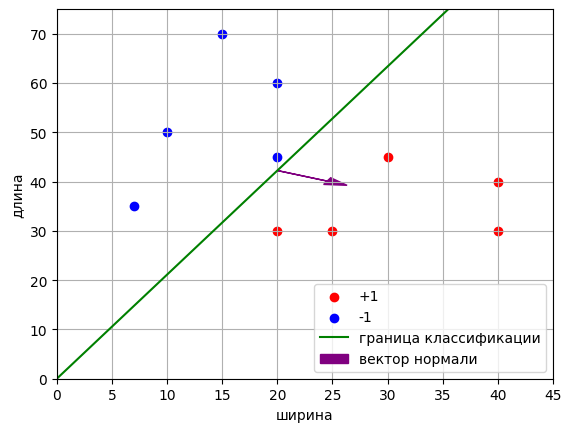

In [ ]:
# Визуализация
x_0 = x_train[y_train == 1]
x_1 = x_train[y_train == -1]

plt.scatter(x_0[:, 0], x_0[:, 1], color='red', label='+1')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue', label='-1')

x_line = np.linspace(0, 45, 100)
y_line = -(w[0] * x_line + b) / w[1]
plt.plot(x_line, y_line, color='green', label='граница классификации')
# Берём точку на линии (середину для красоты)
x0 = 20
y0 = -(w[0]*x0 + b)/w[1]

# Нормализуем вектор, чтобы стрелка не была слишком длинной
w_norm = w / np.sqrt((w.T @ w))

# Рисуем стрелку нормали
plt.arrow(x0, y0, w_norm[0]*5, w_norm[1]*5,
          head_width=1.5, head_length=2, color='purple', label='вектор нормали')

plt.xlim(0, 45)
plt.ylim(0, 75)
plt.xlabel("ширина")
plt.ylabel("длина")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import numpy as np

w = np.array([15, -9, -7])
 # задайте самостоятельно (признаки образов: x0, x1, x2)
x_test = np.array([[1, -8, -4],[1, -2, 2],[1, 4, 8],[1, 6, 3]])
y_test = np.array([1,1,-1,-1]) # задайте самостоятельно (метки класса)
margin = [np.dot(w,x_i) * y_i for x_i,y_i in zip(x_test,y_test)]
# здесь продолжайте программу

[np.int64(115), np.int64(19), np.int64(77), np.int64(60)]

In [ ]:
import numpy as np

# Начальные условия
x1 = np.array([-3, 4])
x2 = np.array([6, -3])

# Вектор признаков x и вектор признаков y
x_chek_pt = np.array([-8, -2, 4, 6], dtype=float)
y_chek_pt = np.array([-4, 2, 8, 3], dtype=float)
# Матрица признаков
x_test = np.vstack([np.ones(len(x_chek_pt)), x_chek_pt, y_chek_pt]).T
# Классификатор
y_test = np.array([1, 1, -1, -1], dtype=int)

def f_omega(x1: np.array, x2: np.array, show = False):
    """
        Решение наименьших квадратов для признаков x1, x2.
        Возвращает:
    к  - угловой коэффициент
    b  - смещение
    mu - нормирующий множитель прямой

        Частный случай:
    если len(x1) и len(x2) = 2, то решение это прямая l такая что (x1 E l) и (x2 E l)

        Полученное ур-е прямой с угловым коэффициентом x2 = k * x1 + b приводм к
    каноническому виду: A * x1 + B * x2 + C = 0,
    где A = k,
        B = -1,
        C = b,
        И находим нормирующий множитель:
    mu = 1 / ((A ** 2 + B ** 2) ** (1/2))
        и вычисляем вектор omega = [mu * b, mu * k, -mu]
    С умножением можно не заморачиваться искомый вектор w это A, B, C, если точнее:
    w0 = C, w1 = A, w2 = B.
    """
    TMP = np.vstack([x1, np.ones(len(x1))]).T
    k, b = np.linalg.lstsq(TMP, x2)[0]
    mu = 1 / np.sqrt(k ** 2 + 1 ** 2)

    if show:
        print(f'k = {k:.8f}\nb = {b:.8f}\nmu = {mu:.8f}')

        # восемь строк ниже не влияют на программу
        A = k
        B = -1
        C = b
        x0 = A
        y0 = B
        t = (A * x0 + B * y0 + C) / (A ** 2 + B ** 2)
        print('Координаты пересечения нормального вектора с прямой')
        print(
            f'x1v_0 = {x0 - A * t:.4f}\nx2v_0 = {y0 - B * t:.4f}' \
            f'\nx1v_1 = {k:.4f}\nx2v_1 = {B:.4f}\n') # Еденичный нормальный вектор

    return b, k, mu


def distance_point_line(b, k, mu, selection: np.array, normal: bool=True):
    # Это проверка признаков через расстояние от точки до прямой и знак.
    # Работает как задумано вывод не инвертировал
    x = selection[:, 1:2]
    y = selection[:, 2:]

    # Условие для переключения с нормального расстояния на отступы...
    # Нормальное расстояние - кратчайшее расстояние от точки до прямой
    # Отступ - не нашёл геометрической интерпретации в литературе,
    # но если зафиксировать у признака, x1 (x1=const), то отступ равен
    # расстоянию от точки пересечения линии  x + x1 = 0 с прямой до
    # точки признака.
    check = mu * k * x - mu * y + mu * b if normal else k * x - y + b
    bool_check = list(map(int, list((check / abs(check)))))

    return [_[0] for _ in check], [_ for _ in bool_check]

if __name__ == '__main__':

    b, k, mu = f_omega(x1, x2, show=False)
    margin_dist, margin_bool = distance_point_line(b, k, mu, selection=x_test, normal=False)
    margin = [float(_[0] * _[1]) for _ in zip(margin_dist, y_test)] # через k * x - y + b и цикл
    margin1 = x_test @ np.array([b, k, -1]).T * y_test # через матричное умножение O(n^3)
    # Отладка
    # print(margin, '*')
    # print(margin1, '**')
    # print(margin1 - margin) # проверка

/var/folders/_q/jch9fljj5nl58d8m44_f5f1c0000gn/T/ipykernel_2355/2475031768.py:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bool_check = list(map(int, list((check / abs(check)))))


In [ ]:
import numpy as np
x_test = np.array([[1, -5, 2],[1, -4, 6],[1, 3, 2],[1, 3, -3],[1, 5, 6],[1, 9, 2]])
w = np.array([-16,-4,9]) # задайте самостоятельно (параметры модели: w0, w1, w2 - ориентация разделяющей линии)
x_test.T

array([[ 1,  1,  1,  1,  1,  1],
       [-5, -4,  3,  3,  5,  9],
       [ 2,  6,  2, -3,  6,  2]])

In [ ]:
import numpy as np

x_test = np.array([(-5, 2), (-4, 6), (3, 2), (3, -3), (5, 5), (5, 2), (-1, 3)])
y_test = np.array([1, 1, 1, -1, -1, -1, -1])
w = np.array([-8/3, -2/3, 1])
x = np.hstack((np.ones((x_test.shape[0],1)),x_test))
margin = w @ x.T * y_test
len(margin[margin < 0])
np.sum(margin < 0)
# здесь продолжайте программу

np.int64(2)

In [ ]:
# array([ 2.66666667,  6.        , -2.66666667, -7.66666667, -1.        ,
#        -4.        ,  1.        ])

In [ ]:
np.concatenate((np.ones((len(x_test),1)),x_test),1)


array([[ 1.,  1., -5.,  2.],
       [ 1.,  1., -4.,  6.],
       [ 1.,  1.,  3.,  2.],
       [ 1.,  1.,  3., -3.],
       [ 1.,  1.,  5.,  5.],
       [ 1.,  1.,  5.,  2.],
       [ 1.,  1., -1.,  3.]])

In [ ]:
x_test.

array([ 1, -5,  2])

In [ ]:
# np.hstack((np.ones((len(x_test),1))),x_test)
np.hstack((np.ones((x_test.shape[0],1)),x_test))

array([[ 1.,  1., -5.,  2.],
       [ 1.,  1., -4.,  6.],
       [ 1.,  1.,  3.,  2.],
       [ 1.,  1.,  3., -3.],
       [ 1.,  1.,  5.,  5.],
       [ 1.,  1.,  5.,  2.],
       [ 1.,  1., -1.,  3.]])

In [ ]:
np.hstack((np.ones((x_test[0],1)),x_test))np.ones((len(x_test), 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])